# Задание по центральной предельной теореме
Мое любимое непрерывное распределение - это распределение Вейбулла( Weibull distribution). Я с ним некоторое время работал, потому как с помощью него можно представить распределение размеров частиц. Описание этого распределения есть на википедии.

Формула такого распределения:
$${\displaystyle f(x;\lambda ,k)={\begin{cases}{\frac {k}{\lambda }}\left({\frac {x}{\lambda }}\right)^{k-1}e^{-(x/\lambda )^{k}}&x\geq 0,\\0&x<0,\end{cases}}}$$
Реализация в виде numpy-зависимой lambda функции приведена ниже:

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

weibull_dist = lambda x, k, lambd: (k / lambd) * ((x / lambd) ** (k - 1)) * np.exp(-(x / lambd) ** k)

Введем константы $\lambda$ и $k$

In [61]:
lambd = 1
k = 1.5

Генерируем выборку объема 1000 и строим график плотности распределения поверх гистограммы

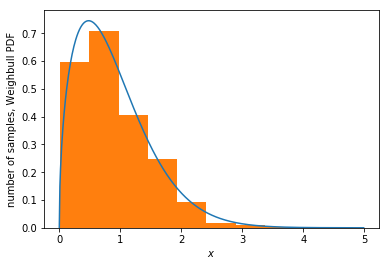

In [62]:
X = np.arange(0, 5, 0.01)
A = np.random.weibull(k, 1000)
plt.plot(X, weibull_dist(X, k,lambd))
plt.hist(A,normed=True)
plt.xlabel('$x$')
plt.ylabel('number of samples, Weighbull PDF')
print()

Создаем функцию, которая создает 1000 выборок по $n$ средних через функции numpy.

In [63]:
def sample_mean_generator(sample_width=5,count_of_sample=1000,k=1.5):
    return np.average(np.random.weibull(k,(sample_width,count_of_sample)),axis = 0)

Рассчитываем параметры эквивалентного нормального распределения, нам дополнительно потребуется реализация гамма функции. Определение матожидания и дисперсии распределения Вейбулла есть в википедии.

In [64]:
from scipy.special import gamma
expected_value = lambd*gamma(1+1/k)
dispersion = (lambd**2)*(gamma(1+2/k)-(gamma(1+1/k))**2)

Наконец, строим гистограммы распределений выборочных средних с наложением эквивалентного нормального распределения.

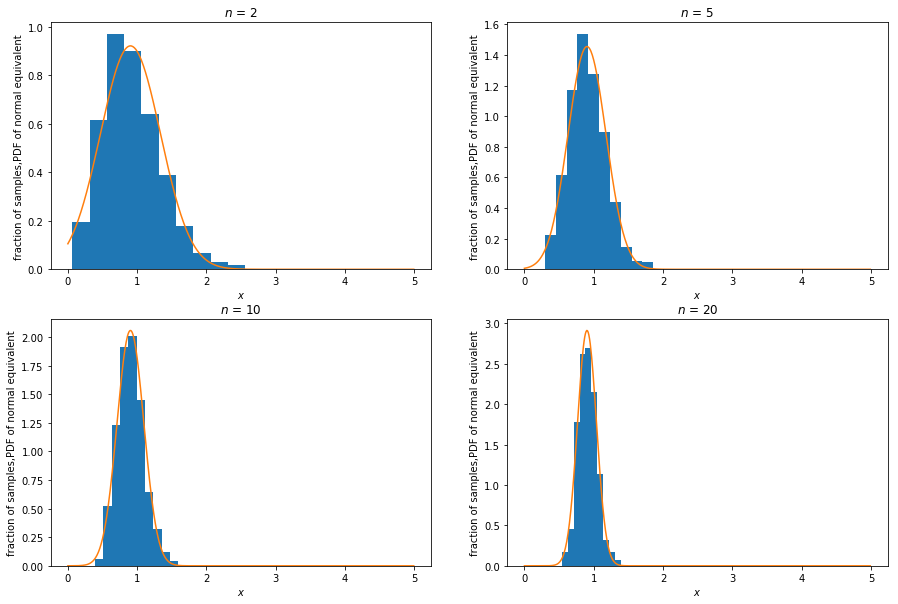

In [65]:
fig,axs = plt.subplots(2,2,figsize=(15,10))
n=2
axs[0][0].hist(sample_mean_generator(n,k=k),normed=True)
axs[0][0].plot(X,norm.pdf(X,expected_value,np.sqrt(dispersion/n)))
axs[0][0].set(xlabel='$x$',ylabel='fraction of samples,PDF of normal equivalent',title='$n$ = {}'.format(n))
n=5
axs[0][1].hist(sample_mean_generator(n,k=k),normed=True)
axs[0][1].plot(X,norm.pdf(X,expected_value,np.sqrt(dispersion/n)))
axs[0][1].set(xlabel='$x$',ylabel='fraction of samples,PDF of normal equivalent',title='$n$ = {}'.format(n))
n=10
axs[1][0].hist(sample_mean_generator(n,k=k),normed=True)
axs[1][0].plot(X,norm.pdf(X,expected_value,np.sqrt(dispersion/n)))
axs[1][0].set(xlabel='$x$',ylabel='fraction of samples,PDF of normal equivalent',title='$n$ = {}'.format(n))
n=20
axs[1][1].hist(sample_mean_generator(n,k=k),normed=True)
axs[1][1].plot(X,norm.pdf(X,expected_value,np.sqrt(dispersion/n)))
axs[1][1].set(xlabel='$x$',ylabel='fraction of samples,PDF of normal equivalent',title='$n$ = {}'.format(n))
print()

## Выводы
Со значения $n=5$ можно считать распределение выборочных средних близким к нормальному. До этого значения распределение все еще является скошенным (skew).
Дальнейшее увеличение $n$ логично приводит к уменьшению дисперсии эквивалентного нормального распределения.